## Phase 3

In [1]:
#Importing necessary libraries
import pandas as pd
import sqlite3
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 3.1

In [2]:
#Importing the dataset
df=pd.read_csv(r'D:\India_Crime - Copy\42_District_wise_crimes_committed_against_women_2001_2012.csv')
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


This data frame contains information related to **Crimes committed against women**. It contains **9017  rows and 10  columns**.    
  
The data frame contains both  **numeric and catagorical data**  
    
**The goal is to insert records into the SQL table.**   

In [3]:
#Checking data type of columns
df.dtypes

STATE/UT                                               object
DISTRICT                                               object
Year                                                    int64
Rape                                                    int64
Kidnapping and Abduction                                int64
Dowry Deaths                                            int64
Assault on women with intent to outrage her modesty     int64
Insult to modesty of Women                              int64
Cruelty by Husband or his Relatives                     int64
Importation of Girls                                    int64
dtype: object

There are **two types** of data present in this data frame which are **int64 and object**. **Majority** of the data types are **int64**.

In [4]:
#checking for whitespace characters in columns of data frame
col=df.columns.tolist() #Storing column's name as list in 'col' variable

space=''#Initilizing empty 'space' variable
validation=0#Initilizaing 'validation' variable

for i in col:#Iterating through 'col' variable
    
    for a in range(1,11): #Iterating for 10 number of times i.e. it can detect upto 10 number of whitespaces per row
        space+=' ' #Incrementing one white space character per iteration
        
        if not df.loc[df[i]==space].empty:#Checking if any row contains white space characters
            
            validation+=1#increasing by 1 in 'validation' variable
            
            print(f'There are white space characters present in {i} Column with length of  {len(space)}  white space characters')#Printing if a column contains white space character along with number of  white space characters present in a single row(Note:It does not print total number of white space characters present in a column)
            
    space=''#Reseting 'space' variable
    
if validation==0:#Using 'if' to check whether 'validation' variable's value matches to '0' or not.
    print('This data frame does not contains any whitespace characters.')

This data frame does not contains any whitespace characters.


In [5]:
df.isnull().sum() #Checking if null values are present in data frame 

STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

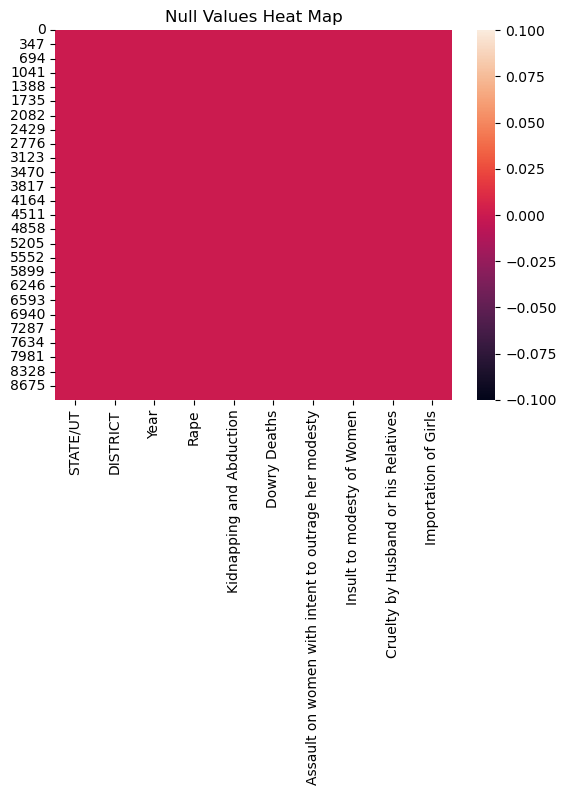

In [6]:
sb.heatmap(df.isnull())#Visualizing null values via Heatmap
plt.title('Null Values Heat Map')
plt.show()

We can confirm that this data frame does not contains null values.

In [7]:
#creating a function named 'dup' to check for duplicate values in data frame

def dup(x):#takes one argument i.e variable which stores data frame
    
    a=x.duplicated().sum()#storing sum of duplicate values in 'a' variable
    
    if a==0:#first condition
        print('This data frame does not contains duplicate values.')#printing
    
    elif a==1:#second condition
        print('There is only 1 duplicate value present in the data frame.')#printing
    
    else:
        print(f'Total duplicate values present in DataFrame are {x.duplicated().sum()}.')#printing
    
dup(df)

This data frame does not contains duplicate values.


In [8]:
#creating connection object
dbcon=sqlite3.connect('India_Crime.db')

In [9]:
#creating cursor
cur=dbcon.cursor()

In [10]:
#writing data of data frame into an SQL table
df.to_sql('Crimes_committed_against_women_2001_2012',dbcon,if_exists='replace',index=False)

9017

In [11]:
dbcon.commit(); #commiting the action

In [12]:
data=cur.execute("select * from Crimes_committed_against_women_2001_2012") #selecting all data from the table

for i in data:#using for loop to print data
    print(i)

('ANDHRA PRADESH', 'ADILABAD', 2001, 50, 30, 16, 149, 34, 175, 0)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 23, 30, 7, 118, 24, 154, 0)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 27, 34, 14, 112, 83, 186, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 20, 20, 17, 126, 38, 57, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 23, 26, 12, 109, 58, 247, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 1, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 54, 51, 7, 139, 129, 378, 0)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 37, 39, 24, 118, 27, 746, 0)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 56, 49, 62, 414, 81, 224, 0)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 47, 30, 17, 180, 336, 172, 0)
('ANDHRA PRADESH', 'KRISHNA', 2001, 37, 21, 10, 208, 72, 265, 0)
('ANDHRA PRADESH', 'KURNOOL', 2001, 29, 47, 13, 141, 107, 92, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 59, 27, 14, 176, 41, 69, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 35, 20, 26, 100, 25, 192, 0)
('ANDHRA PRADESH', 'NALGONDA', 2001, 35, 19, 31, 188, 59, 214, 0)
('AN

We can observe that  data is loaded successfully into the table.

## 3.2

In [13]:
#fetching maximum values of 'Rape' and 'Kidnapping and Abduction' columns

data=cur.execute("select max(Rape), max(\"Kidnapping and Abduction\") from Crimes_committed_against_women_2001_2012")
data.fetchall() #fetching data

[(3425, 7910)]

**Maximum** value of **"Rape"** column is **3425**, and **maximum** value of **"Kidnapping and Abduction"** column is **7910**.

In [14]:
#fetching 'State/UT', 'DISTRICT' and 'year' columns on the basis of maximum values of 'Rape' column

data=cur.execute("select \"STATE/UT\", DISTRICT, Year from Crimes_committed_against_women_2001_2012 where Rape = 3425")
data.fetchall() #fetching data

[('MADHYA PRADESH', 'TOTAL', 2012)]

The data for the maximum number of 'Rape' column is as follows:  
**State/UT - MADHYA PRADESH  
District - TOTAL  
Year - 2012**  

In [15]:
#fetching 'State/UT', 'DISTRICT' and 'year' columns on the basis of maximum values of 'Kidnapping and Abduction' column

data=cur.execute("select \"STATE/UT\", DISTRICT, Year from Crimes_committed_against_women_2001_2012 where \"Kidnapping and Abduction\" = 7910")
data.fetchall() #fetching data

[('UTTAR PRADESH', 'TOTAL', 2012)]

The data for the maximum number of 'Kidnapping and Abduction' column is as follows:  
**State/UT - UTTAR PRADESH  
District - TOTAL  
Year - 2012**  

## 3.3

In [16]:
#fetching minimum values of 'Rape' and 'Kidnapping and Abduction' columns

data=cur.execute("select min(Rape), min(\"Kidnapping and Abduction\") from Crimes_committed_against_women_2001_2012")
data.fetchall() #fetching data

[(0, 0)]

**Minimum** value of **"Rape"** column is **0**, and **minimum** value of **"Kidnapping and Abduction" column** is **0**.

In [17]:
#fetching 'State/UT', 'DISTRICT' and 'year' columns on the basis of minimum values of 'Rape' column

data=cur.execute("select \"STATE/UT\", DISTRICT, Year from Crimes_committed_against_women_2001_2012 where Rape = 0")
data.fetchall() #fetching data

[('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001),
 ('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2001),
 ('ARUNACHAL PRADESH', 'KAMENG WEST', 2001),
 ('ASSAM', 'C.I.D.', 2001),
 ('BIHAR', 'ARWAL', 2001),
 ('BIHAR', 'KATIHAR RLY.', 2001),
 ('CHHATTISGARH', 'GRP RAIPUR', 2001),
 ('HARYANA', 'GRP', 2001),
 ('HIMACHAL PRADESH', 'G.R.P.', 2001),
 ('JAMMU & KASHMIR', 'CRIME JAMMU', 2001),
 ('JAMMU & KASHMIR', 'CRIME SRINAGAR', 2001),
 ('JAMMU & KASHMIR', 'KARGIL', 2001),
 ('JAMMU & KASHMIR', 'LEH', 2001),
 ('JAMMU & KASHMIR', 'RAILWAYS', 2001),
 ('MADHYA PRADESH', 'JABALPUR RLY.', 2001),
 ('MAHARASHTRA', 'PUNE RLY.', 2001),
 ('MANIPUR', 'CHANDEL', 2001),
 ('MANIPUR', 'SENAPATI', 2001),
 ('MANIPUR', 'TAMENGLONG', 2001),
 ('MANIPUR', 'UKHRUL', 2001),
 ('MIZORAM', 'MAMIT', 2001),
 ('NAGALAND', 'KIPHIRE', 2001),
 ('NAGALAND', 'PEREN', 2001),
 ('NAGALAND', 'TUENSANG', 2001),
 ('PUNJAB', 'G.R.P', 2001),
 ('SIKKIM', 'NORTH', 2001),
 ('SIKKIM', 'WEST', 2001),
 ('TAMIL NADU', 'CHENNAI RLY.', 2001),
 ('TAMIL NADU

These are data with the **minimum number** of **'Rape'** column , listed in the order of 'State/UT', 'District', and 'Year', respectively.

In [18]:
#fetching 'State/UT', 'DISTRICT' and 'year' columns on the basis of minimum values of 'Kidnapping and Abduction' column

data=cur.execute("select \"STATE/UT\", DISTRICT, Year from Crimes_committed_against_women_2001_2012 where \"Kidnapping and Abduction\" = 0")
data.fetchall() #fetching data

[('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001),
 ('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2001),
 ('ANDHRA PRADESH', 'VIJAYAWADA RLY.', 2001),
 ('ARUNACHAL PRADESH', 'TAWANG', 2001),
 ('ASSAM', 'C.I.D.', 2001),
 ('ASSAM', 'G.R.P.', 2001),
 ('ASSAM', 'R.P.O.', 2001),
 ('BIHAR', 'ARWAL', 2001),
 ('BIHAR', 'JAMALPUR RLY.', 2001),
 ('CHHATTISGARH', 'BIZAPUR', 2001),
 ('CHHATTISGARH', 'GRP RAIPUR', 2001),
 ('CHHATTISGARH', 'KAWARDHA', 2001),
 ('GUJARAT', 'W.RLY', 2001),
 ('HIMACHAL PRADESH', 'G.R.P.', 2001),
 ('JAMMU & KASHMIR', 'CRIME JAMMU', 2001),
 ('JAMMU & KASHMIR', 'CRIME SRINAGAR', 2001),
 ('JAMMU & KASHMIR', 'RAILWAYS', 2001),
 ('JHARKHAND', 'DEOGHAR', 2001),
 ('JHARKHAND', 'DHANBAD RLY.', 2001),
 ('JHARKHAND', 'DUMKA', 2001),
 ('JHARKHAND', 'JAMSHEDPUR RLY.', 2001),
 ('JHARKHAND', 'PAKUR', 2001),
 ('KARNATAKA', 'CHITRADURGA', 2001),
 ('KARNATAKA', 'HASSAN', 2001),
 ('KARNATAKA', 'RAILWAYS', 2001),
 ('KARNATAKA', 'UDUPI', 2001),
 ('KERALA', 'CBCID', 2001),
 ('KERALA', 'IDUKKI', 2001),
 (

These are data with the **minimum number** of **'Kidnapping and Abduction'** column , listed in the order of 'State/UT', 'District', and 'Year', respectively.

## 3.4

In [19]:
#Importing the dataset
df2=pd.read_csv(r'D:\India_Crime - Copy\02_District_wise_crimes_committed_against_ST_2001_2012.csv')
df2

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0,0,0,0,0,0,0,0,0,0


This data frame contains information related to **Crimes committed against ST**. It contains **9018  rows and 13  columns**.    
  
The data frame contains both  **numeric and catagorical data**  
    
**The goal is to insert records into the SQL table.**   

In [20]:
#Checking data type of columns
df2.dtypes

STATE/UT                                object
DISTRICT                                object
Year                                     int64
Murder                                   int64
Rape                                     int64
Kidnapping Abduction                     int64
Dacoity                                  int64
Robbery                                  int64
Arson                                    int64
Hurt                                     int64
Protection of Civil Rights (PCR) Act     int64
Prevention of atrocities (POA) Act       int64
Other Crimes Against STs                 int64
dtype: object

There are **two types** of data present in this data frame which are **int64 and object**. **Majority** of the data types are **int64**.

In [21]:
#checking for whitespace characters in columns of data frame
col=df2.columns.tolist() #Storing column's name as list in 'col' variable

space=''#Initilizing empty 'space' variable
validation=0#Initilizaing 'validation' variable

for i in col:#Iterating through 'col' variable
    
    for a in range(1,11): #Iterating for 10 number of times i.e. it can detect upto 10 number of whitespaces per row
        space+=' ' #Incrementing one white space character per iteration
        
        if not df2.loc[df2[i]==space].empty:#Checking if any row contains white space characters
            
            validation+=1#increasing by 1 in 'validation' variable
            
            print(f'There are white space characters present in {i} Column with length of  {len(space)}  white space characters')#Printing if a column contains white space character along with number of  white space characters present in a single row(Note:It does not print total number of white space characters present in a column)
            
    space=''#Reseting 'space' variable
    
if validation==0:#Using 'if' to check whether 'validation' variable's value matches to '0' or not.
    print('This data frame does not contains any whitespace characters.')

This data frame does not contains any whitespace characters.


In [22]:
df2.isnull().sum() #Checking if null values are present in data frame 

STATE/UT                                0
DISTRICT                                0
Year                                    0
Murder                                  0
Rape                                    0
Kidnapping Abduction                    0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Protection of Civil Rights (PCR) Act    0
Prevention of atrocities (POA) Act      0
Other Crimes Against STs                0
dtype: int64

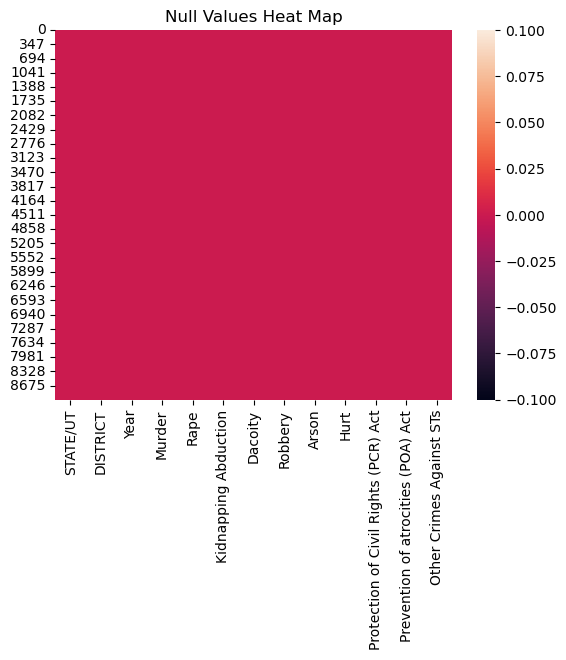

In [23]:
sb.heatmap(df2.isnull())#Visualizing null values via Heatmap
plt.title('Null Values Heat Map')
plt.show()

We can confirm that this data frame does not contains null values.

In [24]:
dup(df2) #checking for duplicates values

Total duplicate values present in DataFrame are 2.


There are **'2' duplicate values present** in the data frame thus, we can **drop** them.

In [25]:
df2.drop_duplicates(inplace=True)#dropping duplicate values

dup(df2)#re-checking for duplicate values

This data frame does not contains duplicate values.


In [26]:
df2.shape#checking shape of the data frame

(9016, 13)

Now the data frame has **9016 rows.**

In [27]:
#writing data of data frame into an SQL table
df2.to_sql('Crimes_committed_against_ST',dbcon,if_exists='replace',index=False)

9016

In [28]:
dbcon.commit(); #commiting the action

In [29]:
data=cur.execute("select * from Crimes_committed_against_ST") #selecting all data from the table

for i in data:#using for loop to print data
    print(i)

('ANDHRA PRADESH', 'ADILABAD', 2001, 0, 1, 2, 0, 0, 0, 2, 0, 0, 13)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 0, 0, 0, 0, 0, 0, 7, 0, 1, 6)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 0, 2, 1, 0, 0, 0, 10, 0, 3, 19)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 0, 0, 0, 0, 0, 0, 15, 0, 0, 2)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 1, 4, 0, 0, 0, 0, 8, 0, 9, 20)
('ANDHRA PRADESH', 'KRISHNA', 2001, 0, 0, 1, 0, 0, 0, 6, 0, 24, 18)
('ANDHRA PRADESH', 'KURNOOL', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 1, 1, 0, 0, 0, 0, 6, 0, 11, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 0, 1, 0, 0, 0, 1, 0, 0, 4, 3)
('ANDHRA PRADESH', 'NALGONDA', 2001, 

We can observe that  data is loaded successfully into the table.

## 3.5

In [30]:
#fetching maximum values of 'Dacoity' and 'Robbery' columns

data=cur.execute("select max(Dacoity), max(Robbery) from Crimes_committed_against_ST")
data.fetchall() #fetching data

[(29, 34)]

**Maximum** value of **"Dacoity"** column is **29**, and **maximum** value of **"Robbery" column** is **34**.

In [31]:
#fetching DISTRICT' columns on the basis of maximum values of 'Dacoity' or 'Robbery' column

data=cur.execute("select DISTRICT from Crimes_committed_against_ST where Dacoity = 29 or Robbery = 34")
data.fetchall() #fetching data

[('DAHOD',), ('TOTAL',)]

These are the **districts** which have **maximum** number of **Dacoity/Robbery**.

## 3.6

In [32]:
#fetching minimum value of 'Murder' column

data=cur.execute("select min(Murder) from Crimes_committed_against_ST")
data.fetchall() #fetching data

[(0,)]

**Minimum** value of **"Murder"** column is **0**.

In [33]:
#fetching DISTRICT' columns on the basis of minimum values of 'Murder' column

data=cur.execute("select DISTRICT from Crimes_committed_against_ST where Murder = 0")

for i in data:#using for loop to print data
    print(i)

('ADILABAD',)
('ANANTAPUR',)
('CHITTOOR',)
('CUDDAPAH',)
('EAST GODAVARI',)
('GUNTAKAL RLY.',)
('GUNTUR',)
('HYDERABAD CITY',)
('KARIMNAGAR',)
('KRISHNA',)
('KURNOOL',)
('MEDAK',)
('NIZAMABAD',)
('PRAKASHAM',)
('RANGA REDDY',)
('SECUNDERABAD RLY.',)
('SRIKAKULAM',)
('VIJAYAWADA',)
('VIJAYAWADA RLY.',)
('VISAKHA RURAL',)
('VISAKHAPATNAM',)
('VIZIANAGARAM',)
('WARANGAL',)
('WEST GODAVARI',)
('CHANGLANG',)
('DIBANG VALLEY',)
('KAMENG EAST',)
('KAMENG WEST',)
('SIANG UPPER',)
('SIANG WEST',)
('SUBANSIRI LOWER',)
('SUBANSIRI UPPER',)
('TAWANG',)
('TIRAP',)
('BARPETA',)
('BONGAIGAON',)
('C.I.D.',)
('CACHAR',)
('DARRANG',)
('DHEMAJI',)
('DHUBRI',)
('DIBRUGARH',)
('G.R.P.',)
('GOALPARA',)
('GOLAGHAT',)
('GUWAHATI CITY',)
('HAILAKANDI',)
('JORHAT',)
('KAMRUP',)
('KARBI ANGLONG',)
('KARIMGANJ',)
('KOKRAJHAR',)
('LAKHIMPUR',)
('MORIGAON',)
('N.C. HILLS',)
('NAGAON',)
('NALBARI',)
('R.P.O.',)
('SIBSAGAR',)
('SONITPUR',)
('TINSUKIA',)
('TOTAL',)
('ARWAL',)
('AURANGABAD',)
('BAGAHA',)
('BANKA',)
('B

These are the districts which have lowest number of murders happened.

# 3.7

In [34]:
#fetching number of murders 

data=cur.execute("select District, Year, Murder from Crimes_committed_against_ST order by District, Year")

for i in data:#using for loop to print data
    print(i)

('24 PARGANAS NORTH', 2001, 0)
('24 PARGANAS NORTH', 2002, 0)
('24 PARGANAS NORTH', 2003, 0)
('24 PARGANAS NORTH', 2004, 0)
('24 PARGANAS NORTH', 2005, 0)
('24 PARGANAS NORTH', 2006, 0)
('24 PARGANAS NORTH', 2007, 0)
('24 PARGANAS NORTH', 2008, 0)
('24 PARGANAS NORTH', 2009, 0)
('24 PARGANAS NORTH', 2010, 0)
('24 PARGANAS NORTH', 2011, 0)
('24 PARGANAS NORTH', 2012, 0)
('24 PARGANAS SOUTH', 2001, 0)
('24 PARGANAS SOUTH', 2002, 0)
('24 PARGANAS SOUTH', 2003, 0)
('24 PARGANAS SOUTH', 2004, 0)
('24 PARGANAS SOUTH', 2005, 0)
('24 PARGANAS SOUTH', 2006, 0)
('24 PARGANAS SOUTH', 2007, 0)
('24 PARGANAS SOUTH', 2008, 0)
('24 PARGANAS SOUTH', 2009, 0)
('24 PARGANAS SOUTH', 2010, 0)
('24 PARGANAS SOUTH', 2011, 0)
('24 PARGANAS SOUTH', 2012, 0)
('A and N ISLANDS', 2007, 0)
('ADILABAD', 2001, 0)
('ADILABAD', 2002, 0)
('ADILABAD', 2003, 0)
('ADILABAD', 2004, 0)
('ADILABAD', 2005, 0)
('ADILABAD', 2006, 0)
('ADILABAD', 2007, 1)
('ADILABAD', 2008, 0)
('ADILABAD', 2009, 0)
('ADILABAD', 2010, 0)
('ADILA

## 3.8.1

In [35]:
#Importing the dataset
df3=pd.read_csv(r'D:\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [36]:
#discarding all columns except for 'STATE/UT','DISTRICT','YEAR','MURDER','ATTEMPT TO MURDER' and 'RAPE' columns

df3=df3[['STATE/UT','DISTRICT','YEAR','MURDER','ATTEMPT TO MURDER','RAPE']]
df3

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23
...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0
9014,PUDUCHERRY,KARAIKAL,2012,5,6,6
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,7


This data frame contains information related to **Crimes committed IPC**. It contains **9017  rows and 6 columns**.    
  
The data frame contains both  **numeric and catagorical data**  
    
**The goal is to insert records into the SQL table.**   

In [37]:
#Checking data type of columns
df3.dtypes

STATE/UT             object
DISTRICT             object
YEAR                  int64
MURDER                int64
ATTEMPT TO MURDER     int64
RAPE                  int64
dtype: object

There are **two types** of data present in this data frame which are **int64 and object**. **Majority** of the data types are **int64**.

In [38]:
#checking for whitespace characters in columns of data frame
col=df3.columns.tolist() #Storing column's name as list in 'col' variable

space=''#Initilizing empty 'space' variable
validation=0#Initilizaing 'validation' variable

for i in col:#Iterating through 'col' variable
    
    for a in range(1,11): #Iterating for 10 number of times i.e. it can detect upto 10 number of whitespaces per row
        space+=' ' #Incrementing one white space character per iteration
        
        if not df3.loc[df3[i]==space].empty:#Checking if any row contains white space characters
            
            validation+=1#increasing by 1 in 'validation' variable
            
            print(f'There are white space characters present in {i} Column with length of  {len(space)}  white space characters')#Printing if a column contains white space character along with number of  white space characters present in a single row(Note:It does not print total number of white space characters present in a column)
            
    space=''#Reseting 'space' variable
    
if validation==0:#Using 'if' to check whether 'validation' variable's value matches to '0' or not.
    print('This data frame does not contains any whitespace characters.')

This data frame does not contains any whitespace characters.


In [39]:
df3.isnull().sum() #Checking if null values are present in data frame 

STATE/UT             0
DISTRICT             0
YEAR                 0
MURDER               0
ATTEMPT TO MURDER    0
RAPE                 0
dtype: int64

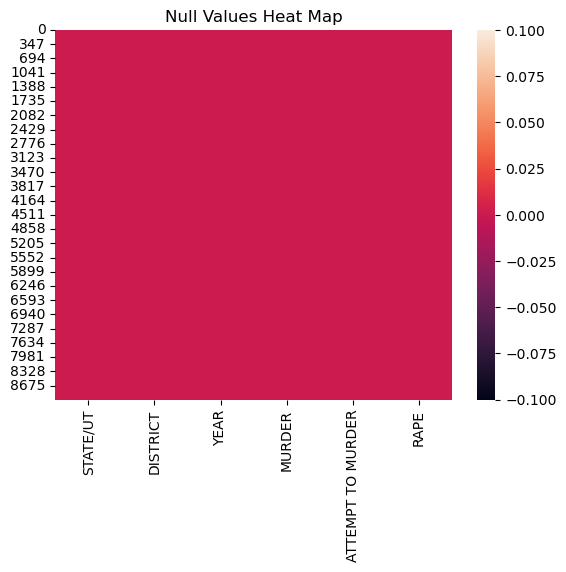

In [40]:
sb.heatmap(df3.isnull())#Visualizing null values via Heatmap
plt.title('Null Values Heat Map')
plt.show()

We can confirm that this data frame does not contains null values.

In [41]:
dup(df3) #checking for duplicates values

This data frame does not contains duplicate values.


In [42]:
#writing data of data frame into an SQL table
df3.to_sql('Crimes_committed_IPC',dbcon,if_exists='replace',index=False)

9017

In [43]:
dbcon.commit(); #commiting the action

In [44]:
data=cur.execute("select * from Crimes_committed_IPC") #selecting all data from the table

for i in data:#using for loop to print data
    print(i)

('ANDHRA PRADESH', 'ADILABAD', 2001, 101, 60, 50)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 151, 125, 23)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 101, 57, 27)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 80, 53, 20)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 82, 67, 23)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 3, 1, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 182, 88, 54)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 111, 113, 37)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 162, 85, 56)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 93, 60, 47)
('ANDHRA PRADESH', 'KRISHNA', 2001, 65, 51, 37)
('ANDHRA PRADESH', 'KURNOOL', 2001, 133, 72, 29)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 157, 67, 59)
('ANDHRA PRADESH', 'MEDAK', 2001, 101, 56, 35)
('ANDHRA PRADESH', 'NALGONDA', 2001, 122, 60, 35)
('ANDHRA PRADESH', 'NELLORE', 2001, 89, 69, 46)
('ANDHRA PRADESH', 'NIZAMABAD', 2001, 106, 49, 21)
('ANDHRA PRADESH', 'PRAKASHAM', 2001, 102, 82, 19)
('ANDHRA PRADESH', 'RANGA REDDY', 2001, 214, 95, 72)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.

We can observe that  data is loaded successfully into the table.

## 3.8.2

In [45]:
#fetching 'STATE/UT', 'YEAR', 'DISTRICT', and 'MURDER' columns based on the Districts in each 'STATE/UT' having the highest number of murders yearwise.

data=cur.execute("select \"STATE/UT\", YEAR, DISTRICT, MURDER from Crimes_committed_IPC where (YEAR, MURDER) in (select YEAR, max(MURDER) from Crimes_committed_IPC group by \"STATE/UT\", YEAR) order by YEAR")

for i in data: #using for loop to print data
    print(i)

('ANDHRA PRADESH', 2001, 'ADILABAD', 101)
('ANDHRA PRADESH', 2001, 'CHITTOOR', 101)
('ANDHRA PRADESH', 2001, 'GUNTAKAL RLY.', 3)
('ANDHRA PRADESH', 2001, 'MEDAK', 101)
('ANDHRA PRADESH', 2001, 'TOTAL', 2602)
('ARUNACHAL PRADESH', 2001, 'DIBANG VALLEY', 3)
('ARUNACHAL PRADESH', 2001, 'KAMENG EAST', 3)
('ARUNACHAL PRADESH', 2001, 'SIANG EAST', 7)
('ARUNACHAL PRADESH', 2001, 'SIANG UPPER', 1)
('ARUNACHAL PRADESH', 2001, 'TOTAL', 83)
('ASSAM', 2001, 'DHEMAJI', 15)
('ASSAM', 2001, 'G.R.P.', 13)
('ASSAM', 2001, 'TOTAL', 1356)
('BIHAR', 2001, 'JAMALPUR RLY.', 7)
('BIHAR', 2001, 'KATIHAR RLY.', 7)
('BIHAR', 2001, 'KISHANGANJ', 25)
('BIHAR', 2001, 'MUZAFFARPUR RLY.', 13)
('BIHAR', 2001, 'NAUGACHIA', 36)
('BIHAR', 2001, 'SAHARSA', 36)
('BIHAR', 2001, 'TOTAL', 3643)
('CHHATTISGARH', 2001, 'BALRAMPUR', 13)
('CHHATTISGARH', 2001, 'DANTEWARA', 83)
('CHHATTISGARH', 2001, 'KANKER', 31)
('CHHATTISGARH', 2001, 'KAWARDHA', 19)
('CHHATTISGARH', 2001, 'RAJNANDGAON', 36)
('CHHATTISGARH', 2001, 'TOTAL', 880)

This is the data which shows **Districts in each 'STATE/UT'** having the highest number of murders yearwise.

## 3.8.3

In [46]:
#storing results of above data (3.8.2) into data frame
data=cur.execute("select \"STATE/UT\", YEAR, DISTRICT, MURDER from Crimes_committed_IPC where (YEAR, MURDER) in (select YEAR, max(MURDER) from Crimes_committed_IPC group by \"STATE/UT\", YEAR) order by YEAR")

a_3_8_3=pd.DataFrame(data.fetchall(),columns=['STATE/UT','YEAR','DISTRICT','MURDER'])#creating a data frame
a_3_8_3

,STATE/UT,YEAR,DISTRICT,MURDER
0,ANDHRA PRADESH,2001,ADILABAD,101
1,ANDHRA PRADESH,2001,CHITTOOR,101
2,ANDHRA PRADESH,2001,GUNTAKAL RLY.,3
3,ANDHRA PRADESH,2001,MEDAK,101
4,ANDHRA PRADESH,2001,TOTAL,2602
...,...,...,...,...
1552,DELHI UT,2012,EOW,0
1553,DELHI UT,2012,STF,0
1554,LAKSHADWEEP,2012,LAKSHADWEEP,0
1555,LAKSHADWEEP,2012,TOTAL,0


Sucessfully stored data into the data frame.

This data frame contains 1557 rows and 4 columns.  
It contains both catagorical and numerical data.  



In [47]:
district_counts=a_3_8_3.groupby('DISTRICT')['YEAR'].nunique()#grouping 'DISTRICT' and 'YEAR' columns and storing number of unique values  

result_district=district_counts[district_counts>=3] #filtering districts that appear 3 or more than 3 years

district_list=result_district.index.to_list()#storing names of districts which appear 3 or more than 3 years as a list

#printing
print('Filtered data :\n',result_district)
print('\n\nDistrict Names :\n',district_list)

Filtered data :
 DISTRICT
AHWA-DANG              5
AMBALA                 3
ANANTNAG               3
ANDAMAN                5
ASHOK NAGAR            3
                      ..
UNA                    4
UPPER DIBANG VALLEY    7
VIJAYAWADA RLY.        4
WAYANADU               5
WEST                   6
Name: YEAR, Length: 151, dtype: int64


District Names :
 ['AHWA-DANG', 'AMBALA', 'ANANTNAG', 'ANDAMAN', 'ASHOK NAGAR', 'AWANTIPORA', 'BADDIPOLICEDIST', 'BAGESHWAR', 'BALRAMPUR', 'BARAN', 'BARNALA', 'BHATINDA', 'BHILWARA', 'BHOPAL RLY.', 'BILASPUR', 'BURDWAN', 'BUXAR', 'C.I.D.', 'CAW', 'CHAMARAJNAGAR', 'CHAMBA', 'CHAMOLI', 'CHAMPAWAT', 'CHANDIGARH', 'CHENNAI RLY.', 'CHIRANG', 'CHURACHANDPUR', 'CID', 'COIMBATORE URBAN', 'CRIME JAMMU', 'CRIME SRINAGAR', 'D and N HAVELI', 'DAKSHIN DINAJPUR', 'DAMAN', 'DAUSA', 'DELHI UT TOTAL', 'DEOGARH', 'DHALAI', 'DHAMTARI', 'DHARWAD COMMR.', 'DHENKANAL', 'DIMAPUR', 'DINDORI', 'DIU', 'EAST', 'EOW', 'ERNAKULAM COMMR.', 'FATEHGARH SAHIB', 'G.R.P', 'G.R.P.', 'GA

These are the districts which appear 3 or more than 3 years in the data frame.

In [48]:
sorted_data=a_3_8_3[a_3_8_3['DISTRICT'].isin(district_list)]#storing data from data frame according to 'district_list'

sorted_data=sorted_data.sort_values(by='DISTRICT',ascending=False) #sorting data in descending order on the basis of 'DISTRICT' column

sorted_data

,STATE/UT,YEAR,DISTRICT,MURDER
706,SIKKIM,2006,WEST,4
571,SIKKIM,2005,WEST,1
960,SIKKIM,2008,WEST,2
486,DELHI UT,2004,WEST,67
1088,SIKKIM,2009,WEST,5
...,...,...,...,...
1020,GUJARAT,2009,AHWA-DANG,5
1442,GUJARAT,2012,AHWA-DANG,7
266,GUJARAT,2003,AHWA-DANG,6
511,GUJARAT,2005,AHWA-DANG,5


## 3.8.4

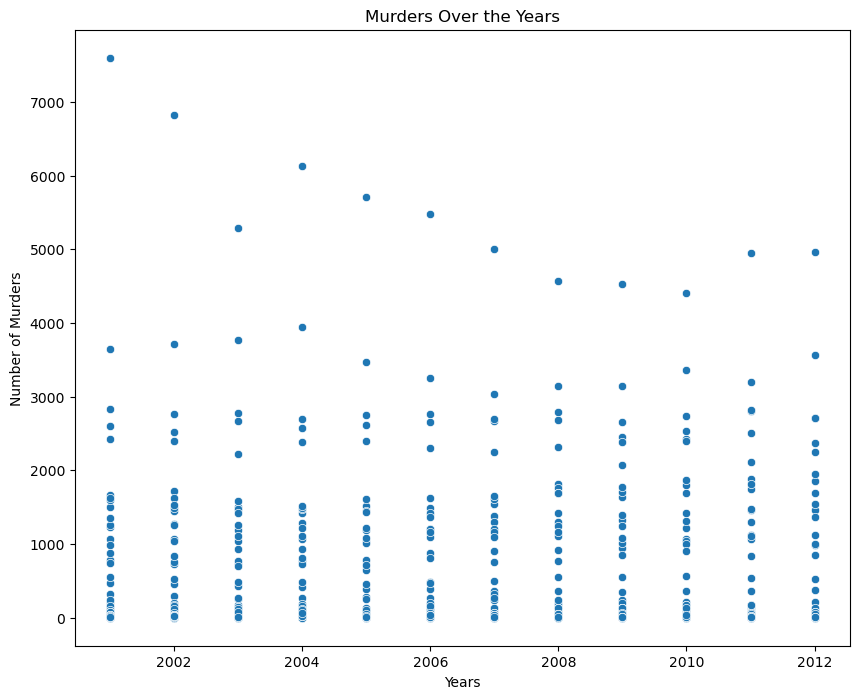

In [49]:
#using scatter plot to plot graph between 'MURDER' and 'YEAR' columns

plt.figure(figsize=(10,8))
sb.scatterplot(data=sorted_data,y='MURDER',x='YEAR')
plt.xlabel('Years')
plt.ylabel('Number of Murders')
plt.title('Murders Over the Years')
plt.show()

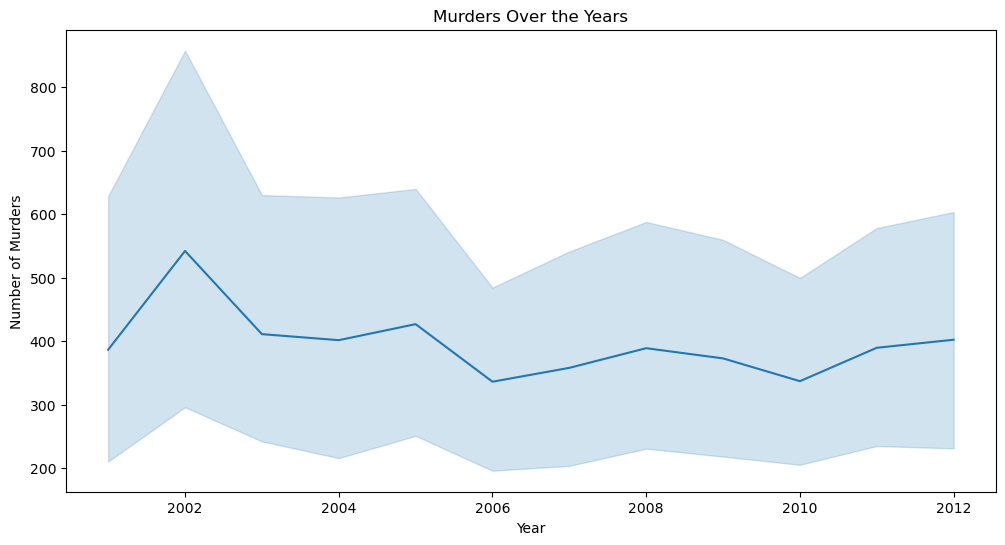

In [50]:
#using line plot to plot graph between 'MURDER' and 'YEAR' columns

plt.figure(figsize=(12, 6))
sb.lineplot(x='YEAR', y='MURDER', data=sorted_data)
plt.xlabel('Year')
plt.ylabel('Number of Murders')
plt.title('Murders Over the Years')
plt.show()

From **'MURDER' vs 'Year'** columns, we can **observe** that **Number of murders have dropped** since the **year '2002'.**

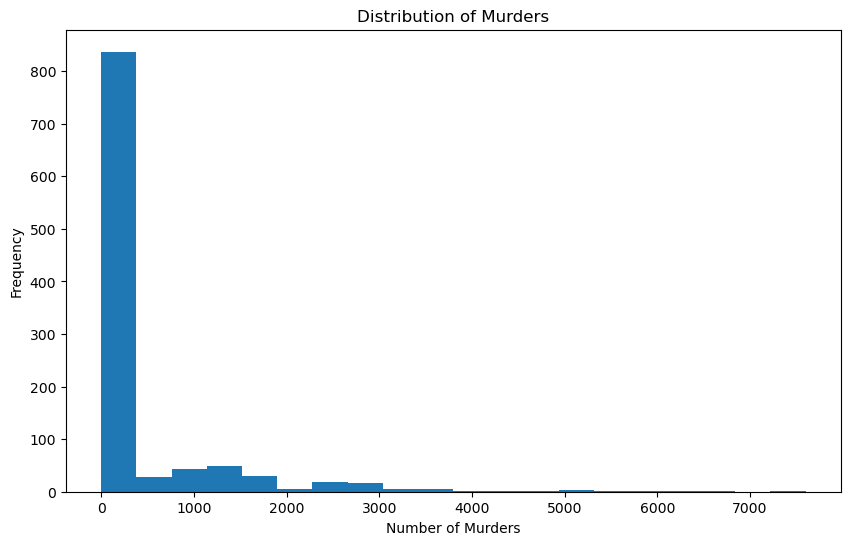

In [51]:
#using scatter plot on 'MURDER' colum

plt.figure(figsize=(10,6))
plt.hist(sorted_data['MURDER'],bins=20)
plt.xlabel('Number of Murders')
plt.ylabel('Frequency')
plt.title('Distribution of Murders')
plt.show()


We can observe that **most frequency of murders** are **from 0-1000.**

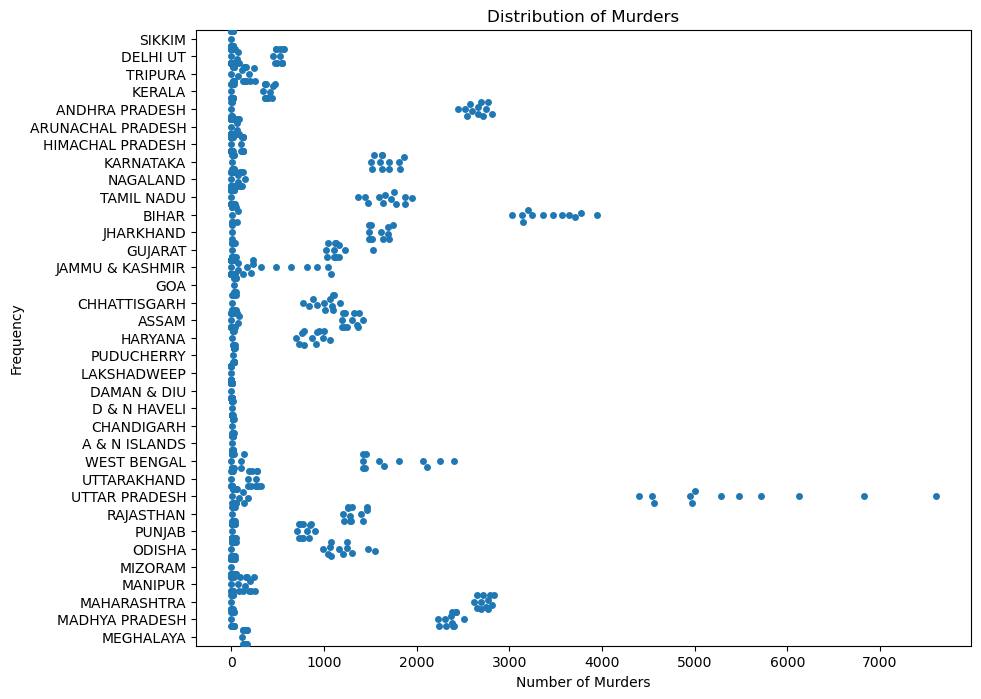

In [52]:
#using cat plot to plot graph between  'MURDER' and 'STATE/UT' colums

plt.figure(figsize=(10,8))
sb.swarmplot(data=sorted_data,x='MURDER',y='STATE/UT')
plt.xlabel('Number of Murders')
plt.ylabel('Frequency')
plt.title('Distribution of Murders')
plt.show()

We can observe that **highest number of Murders** are from **'UTTAR PRADESH'** State.